# **SME5924 - Processos Dinâmicos em Redes Complexas**


---


## **Questionário 2**

### Gabriela dos Santos Amaral

# **Introdução**

Notebook contendo os códigos desenvolvidos na linguagem *Python* para responder o questionário 2 da disciplina de Processos Dinâmicos em Redes Complexas (SME5924).

In [ ]:
# Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import requests
from scipy.stats import pearsonr

import random
import math

# **Questão 1:** Para a rede social Hamsterster, calcule a média dos menores caminhos e o diâmetro. Considere apenas o maior componente.



Primeiro, vamos ler os dados Hamsterster e visualizar o grafo:

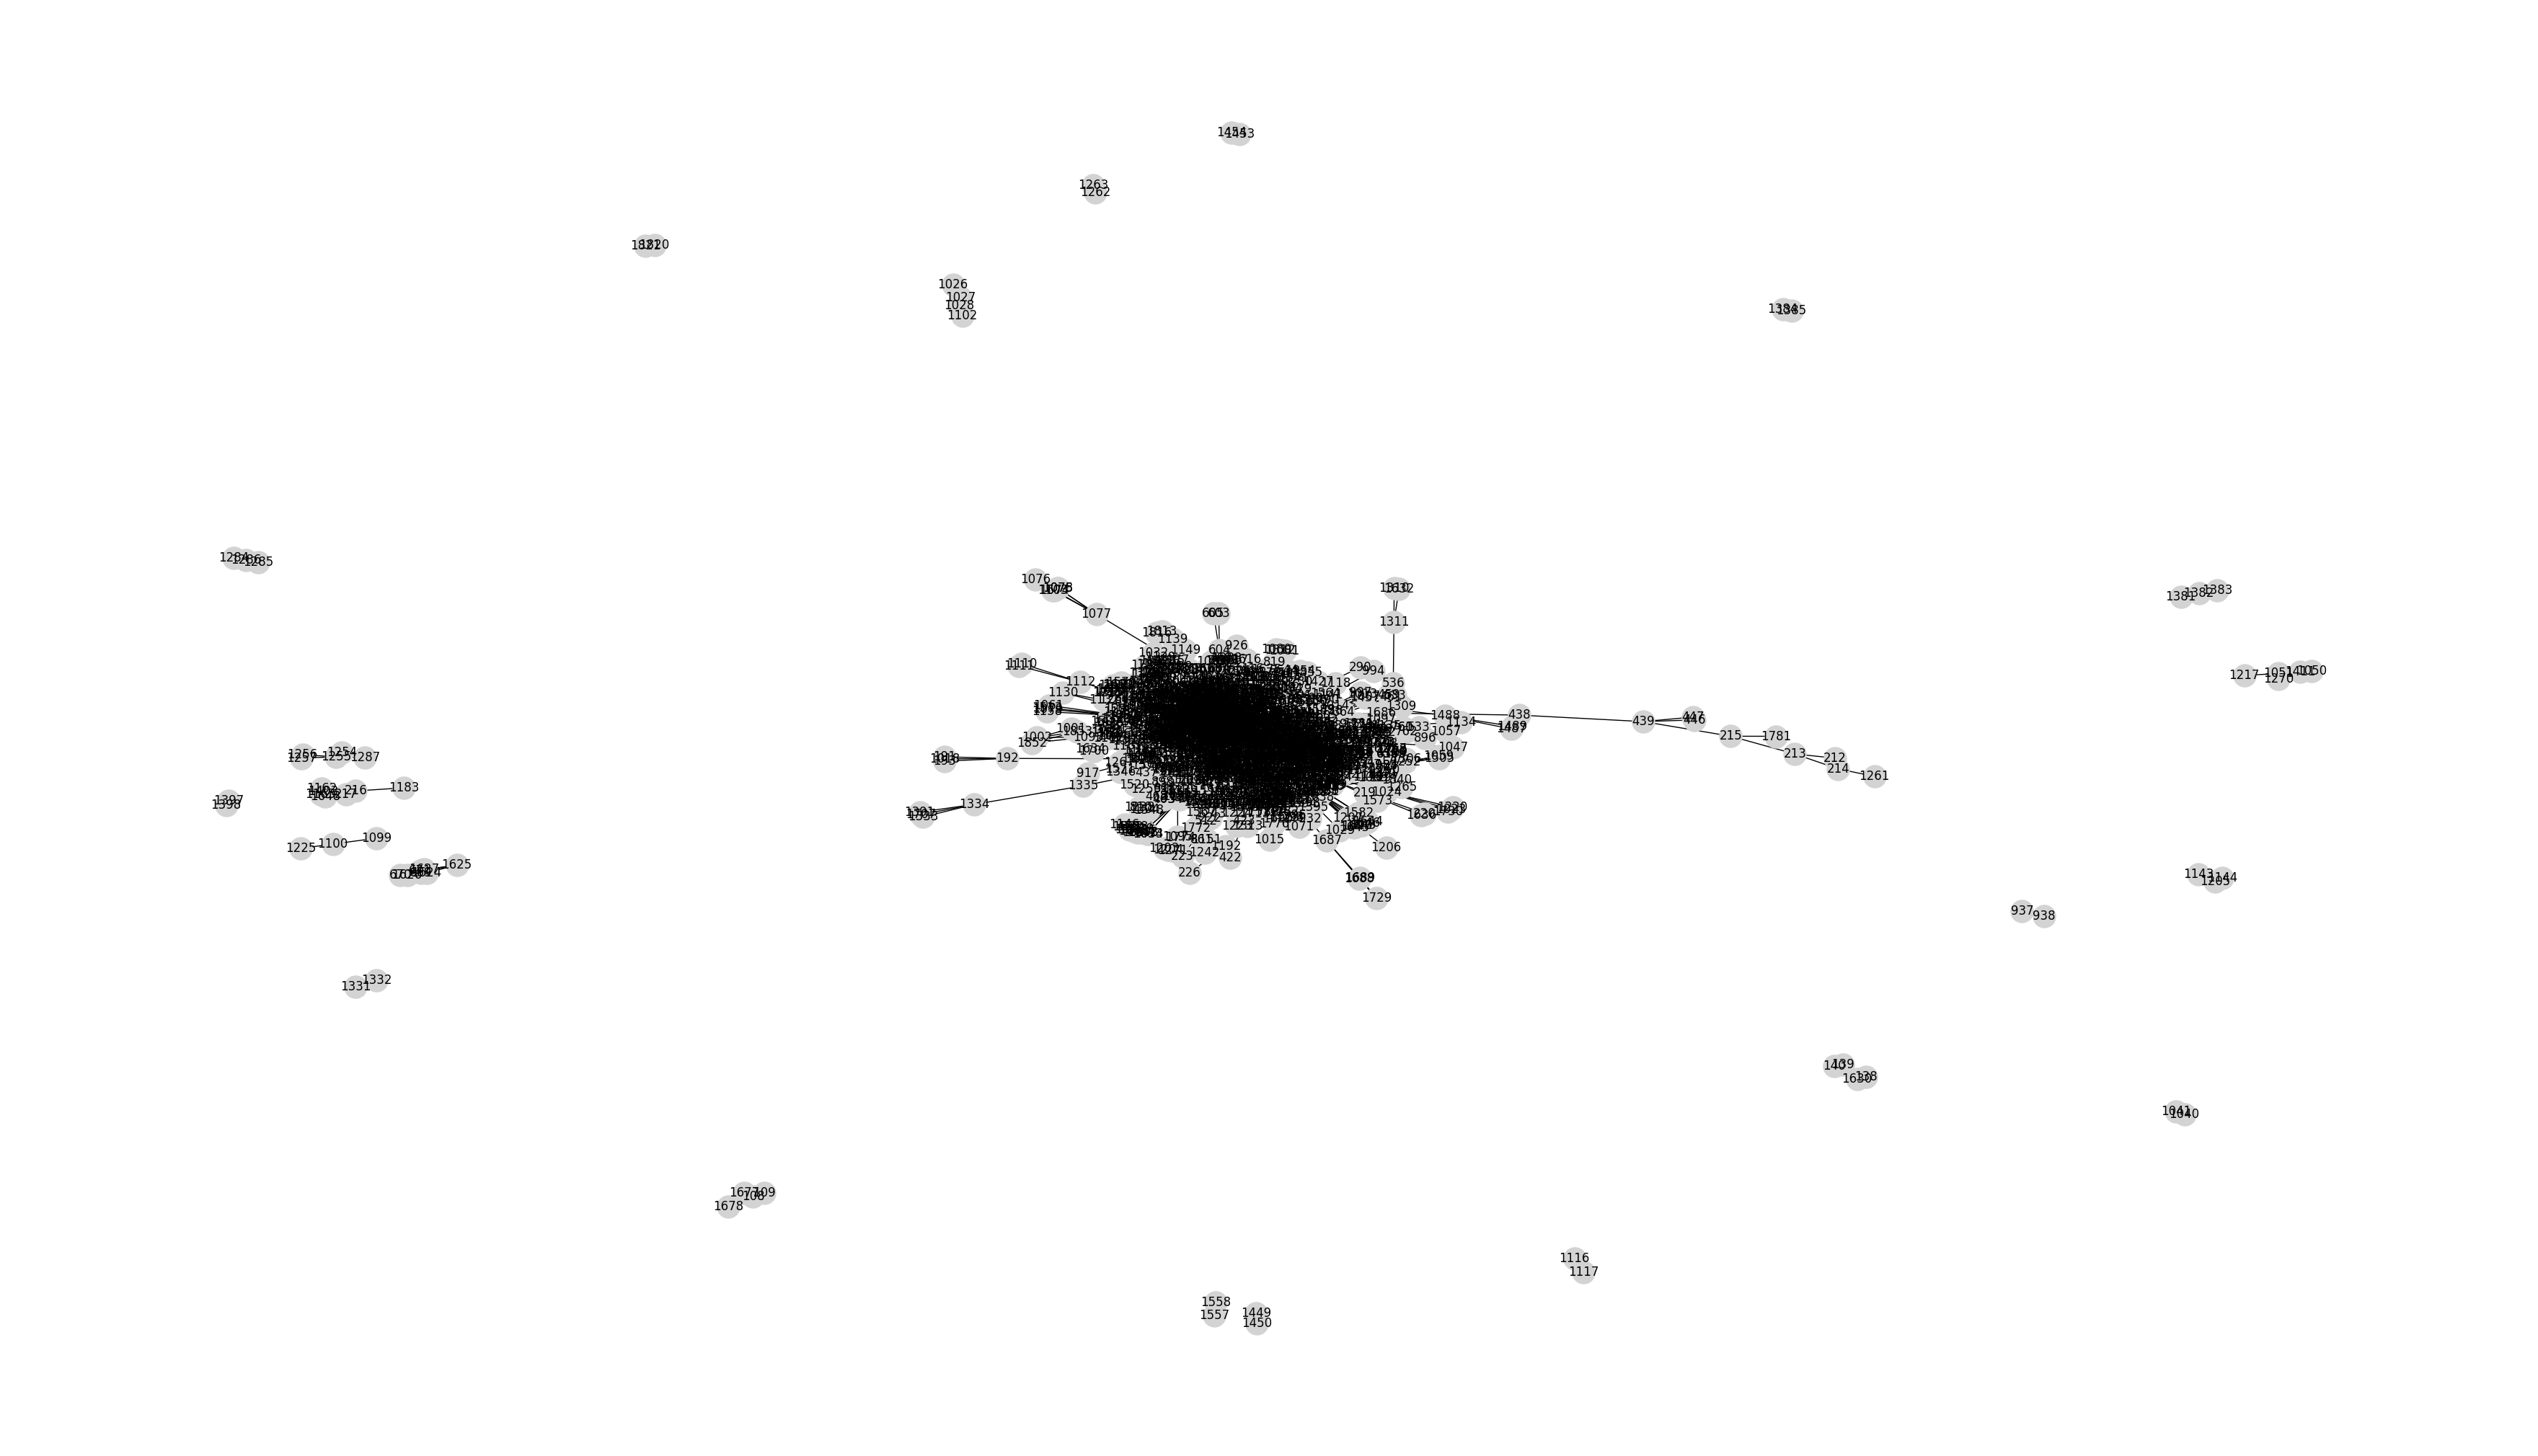

In [ ]:
# Leitura da rede
network = 'hamsterster'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G, pos, node_color='lightgray', node_size=500, with_labels=True)

In [ ]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

Vamos selecionar apenas o maior componente conectado:

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [ ]:
N = len(G)
M = G.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 1788
Número de arestas: 12476


Agora, vamos calcular a média dos menores caminhos e o diâmetro:

In [ ]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Média dos menores caminhos:", "%3.2f"%l)
else:
    print("O grafo tem mais de um componente conectado.")

Média dos menores caminhos: 3.45


In [ ]:
d = nx.diameter(G)
print('Diâmetro da rede:', d)

Diâmetro da rede: 14


Obtemos que a média dos menores caminhos é de 3.45. Assim, pode-se dizer que o acesso de um vértice i para um vértice j da rede, em geral, pode ser feita facilmente.

Encontramos que o diâmetro da rede é igual a 14, que indica o maior menor caminho.

# **Questão 2:** Para a rede de aeroportos (base USairport500), calcule a média e variância do comprimento dos menores caminhos. Considere apenas o maior componente na rede.



Primeiro, vamos ler os dados USairport500 e visualizar o grafo:

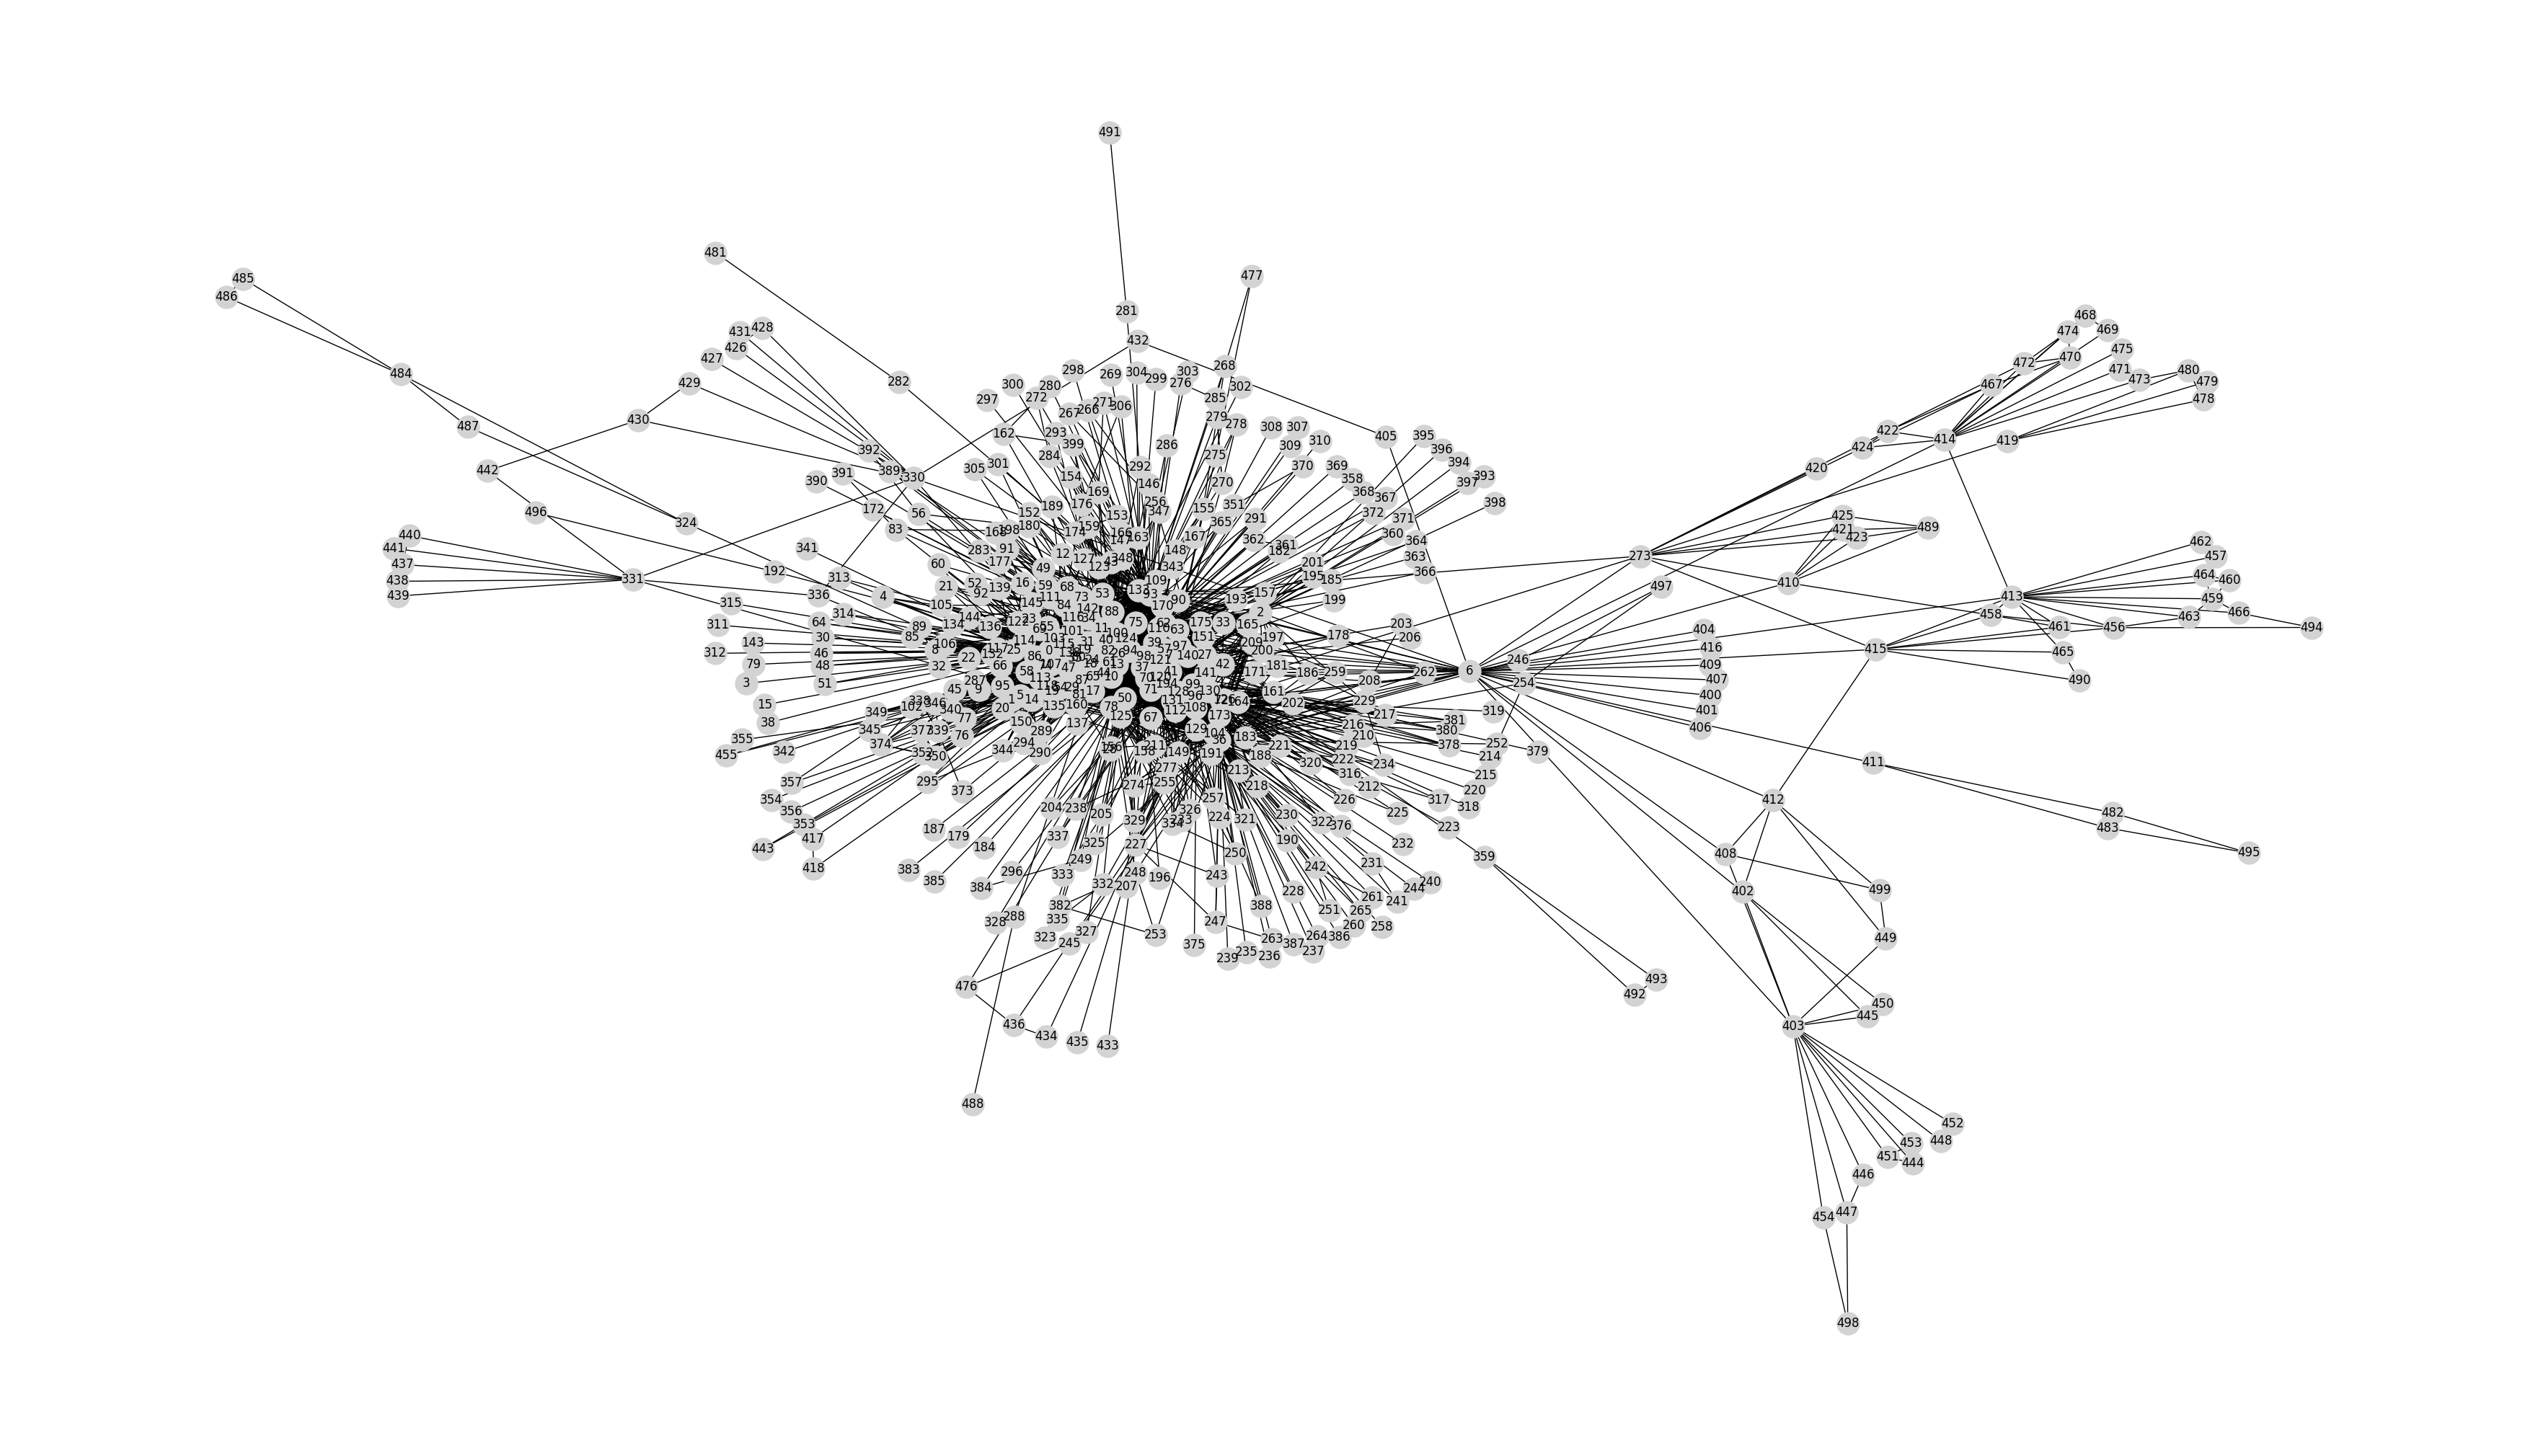

In [ ]:
# Leitura da rede
network = 'USairport500'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G2 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G2 = nx.convert_node_labels_to_integers(G2, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G2, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G2, pos, node_color='lightgray', node_size=500, with_labels=True)

In [ ]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G2 = G2.to_undirected()
G2.remove_edges_from(nx.selfloop_edges(G2))

Vamos selecionar apenas o maior componente conectado:

In [ ]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [ ]:
N = len(G2)
M = G2.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 500
Número de arestas: 2980


Agora, vamos calcular a média dos menores caminhos:

In [ ]:
if nx.is_connected(G2) == True:
    l = nx.average_shortest_path_length(G2)
    print("Média dos menores caminhos:", "%3.3f"%l)
else:
    print("O grafo tem mais de um componente conectado.")

Média dos menores caminhos: 2.991


In [ ]:
# if nx.is_connected(G2):
#     path_len2ths = dict(nx.all_pairs_shortest_path_length(G2))  # Obtém todos os caminhos mais curtos
#     all_distances = []

#     for source in path_lengths:
#         for target in path_lengths[source]:
#             if source != target:  # Evita incluir distância para si mesmo (0)
#                 all_distances.append(path_lengths[source][target])

#     mean_distance = np.mean(all_distances)
#     variance_distance = np.var(all_distances, ddof=0)  # Variância populacional

#     print("Menor distância média:", round(mean_distance, 2))
#     print("Variância da distância média:", round(variance_distance, 2))

# else:
#     print("O grafo tem mais do que uma componente conectada")

Também iremos calcular a variância. O cálculo da variância (e também da média) são feitos de duas formas a seguir:

In [ ]:
paths = dict(nx.shortest_path_length(G2)) # dicionário onde cada chave é um nó e o valor é outro dicionário com as distâncias mais curtas para os outros nós

# Extraindo todas as distâncias dos menores caminhos
all_shortest_paths = []
for dicionario in paths.values():
    all_shortest_paths.extend(dicionario.values())

# Função para soma dos elementos de uma lista
def sum(lista):
  sum = 0

  for i in lista:
    sum += i
  return sum

# Cálculo da média dos menores caminhos
mean = sum(all_shortest_paths)/len(all_shortest_paths)

# Cálculo da variância dos menores caminhos
sum_list = []
for shortest_path in all_shortest_paths:
  sum_aux = (shortest_path - mean)**2
  sum_list.append(sum_aux)

var = sum(sum_list)/(len(all_shortest_paths) - 1)

# Print da média e variância dos menores caminhos
print("Média dos menores caminhos:", round(mean, 2))
print("Variância dos menores caminhos:", round(var, 2))

Média dos menores caminhos: 2.99
Variância dos menores caminhos: 0.83


In [ ]:
# Outra forma

paths = dict(nx.shortest_path_length(G2)) # dicionário onde cada chave é um nó e o valor é outro dicionário com as distâncias mais curtas para os outros nós

# Extraindo todas as distâncias dos menores caminhos
all_shortest_paths = []
for dict_i in paths.values():
    all_shortest_paths.extend(dict_i.values())

# Calculando a variância dos menores caminhos
mean_shortest_paths = np.mean(all_shortest_paths)

# Calculando a variância dos menores caminhos
var_shortest_paths = np.var(all_shortest_paths)

print("Média dos menores caminhos:", round(mean_shortest_paths, 2))
print("Variância dos menores caminhos:", round(var_shortest_paths, 2))

Média dos menores caminhos: 2.99
Variância dos menores caminhos: 0.83


Temos que a média dos menores caminhos é de 2.99, indicando que os caminhos para acessar um vértice j a partir de um vértice i são curtos, de modo que o acesso entre pares de nós pode ser feita facilmente.

Obtemos uma variância igual a 0.83, um valor que pode ser considerado pequeno considerando a magnitude dos dados. Isso indica que os menores caminhos não se distanciam muito da média.

# **Questão 3:** Calcule o coeficiente de assortatividade para a rede Hamsterster. Considere apenas o maior componente.



Para este exercício, usaremos a mesma rede da questão 1: Hamsterter.

Vamos calcular o coeficiente de assortatividade para o maior componente:

In [ ]:
r = nx.degree_assortativity_coefficient(G)
print("Assortatividade = ","%3.4f"%r)

Assortatividade =  -0.0889


Temos que a assortatividade (-0.0889) é negativa, indicando que vértices com muitas conexões tendem a se conectar com vértices pouco conectados. No entanto, como o valor em módulo é próximo de zero, essa relação é pouco significativa, indicando que não há um forte padrão na conexão entre vértices de diferentes graus.

# **Questão 4:** Para a rede de aeroportos (USairport500), calcule a entropia de Shannon considerando o comprimento dos menores caminhos. Use o logaritmo na base 2 e considere apenas o maior componente.



Para este exercício, usaremos a mesma rede da questão 2: USairport500.

A seguir, uma função para calcular a entropia de Shannon, que mede o nível de heterogeneidade nas conexões da rede:

In [ ]:
def shortest_path_lenth_distribution(G):

    paths = dict(nx.shortest_path_length(G)) # dicionário onde cada chave é um nó e o valor é outro dicionário com as distâncias mais curtas para os outros nós

    # Lista com todos os caminhos mais curtos
    all_shortest_paths = []
    for dict_i in paths.values():
      all_shortest_paths.extend(dict_i.values())

    # Lista com todos os caminhos mais curtos único
    unique_paths = []
    for path in all_shortest_paths:
        if path not in unique_paths:
            if path > 0: # para desconsiderar os caminhos de i para ele mesmo
                unique_paths.append(path)

    # Calculando a probabilidade de cada caminho mais curto
    Pslp = []
    for i in unique_paths:
        Pslp_aux = all_shortest_paths.count(i)/len(all_shortest_paths)
        Pslp.append(Pslp_aux)

    splvalues = unique_paths

    # print(splvalues)
    # print(Pslp)
    return splvalues, Pslp


def shannon_entropy(G):
  shortest_path_length, Pshortest_path_length = shortest_path_lenth_distribution(G)
  H = 0
  for p in Pshortest_path_length:
      if(p > 0):
          H = H - p*math.log(p, 2)
  return H

In [ ]:
# def shortest_path_lenth_distribution(G):

#     paths = dict(nx.shortest_path_length(G)) # dicionário onde cada chave é um nó e o valor é outro dicionário com as distâncias mais curtas para os outros nós

#     all_shortest_paths = []
#     for target_dict in paths.values():
#       all_shortest_paths.extend(target_dict.values())

#     all_shortest_paths = np.array(all_shortest_paths)

#     maxspl = np.max(all_shortest_paths)
#     minspl = np.min(all_shortest_paths)
#     splvalues= np.arange(0,maxspl+1) # possíveis valores para spl
#     Pspl = np.zeros(maxspl+1) # P(slp)
#     for spl in all_shortest_paths:
#         Pspl[spl] = Pspl[spl] + 1
#     Pspl = Pspl/sum(Pspl) # a soma dos elementos de P(spl) deve ser igual a um
#     return splvalues,Pspl

In [ ]:
H = shannon_entropy(G2)
print("Shannon Entropy = ", "%3.2f"%H)

Shannon Entropy =  1.88


Podemos interpretar que a rede é pouco complexa, pois apresenta uma entropia de Shannon (1.88) baixa. Dessa forma, é necessário pouca informação para explicar a topologia dessa rede. No entanto, seria interessante comparar esse valor de entropia com o de outra rede, para se fazer um comparativo com a entropia de uma rede refência.

# **Questão 5:** Calcule o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau para a rede de palavras (word_adjacencies). Considere apenas o maior componente conectado.



Primeiro, vamos ler os dados word_adjacencies e visualizar o grafo:

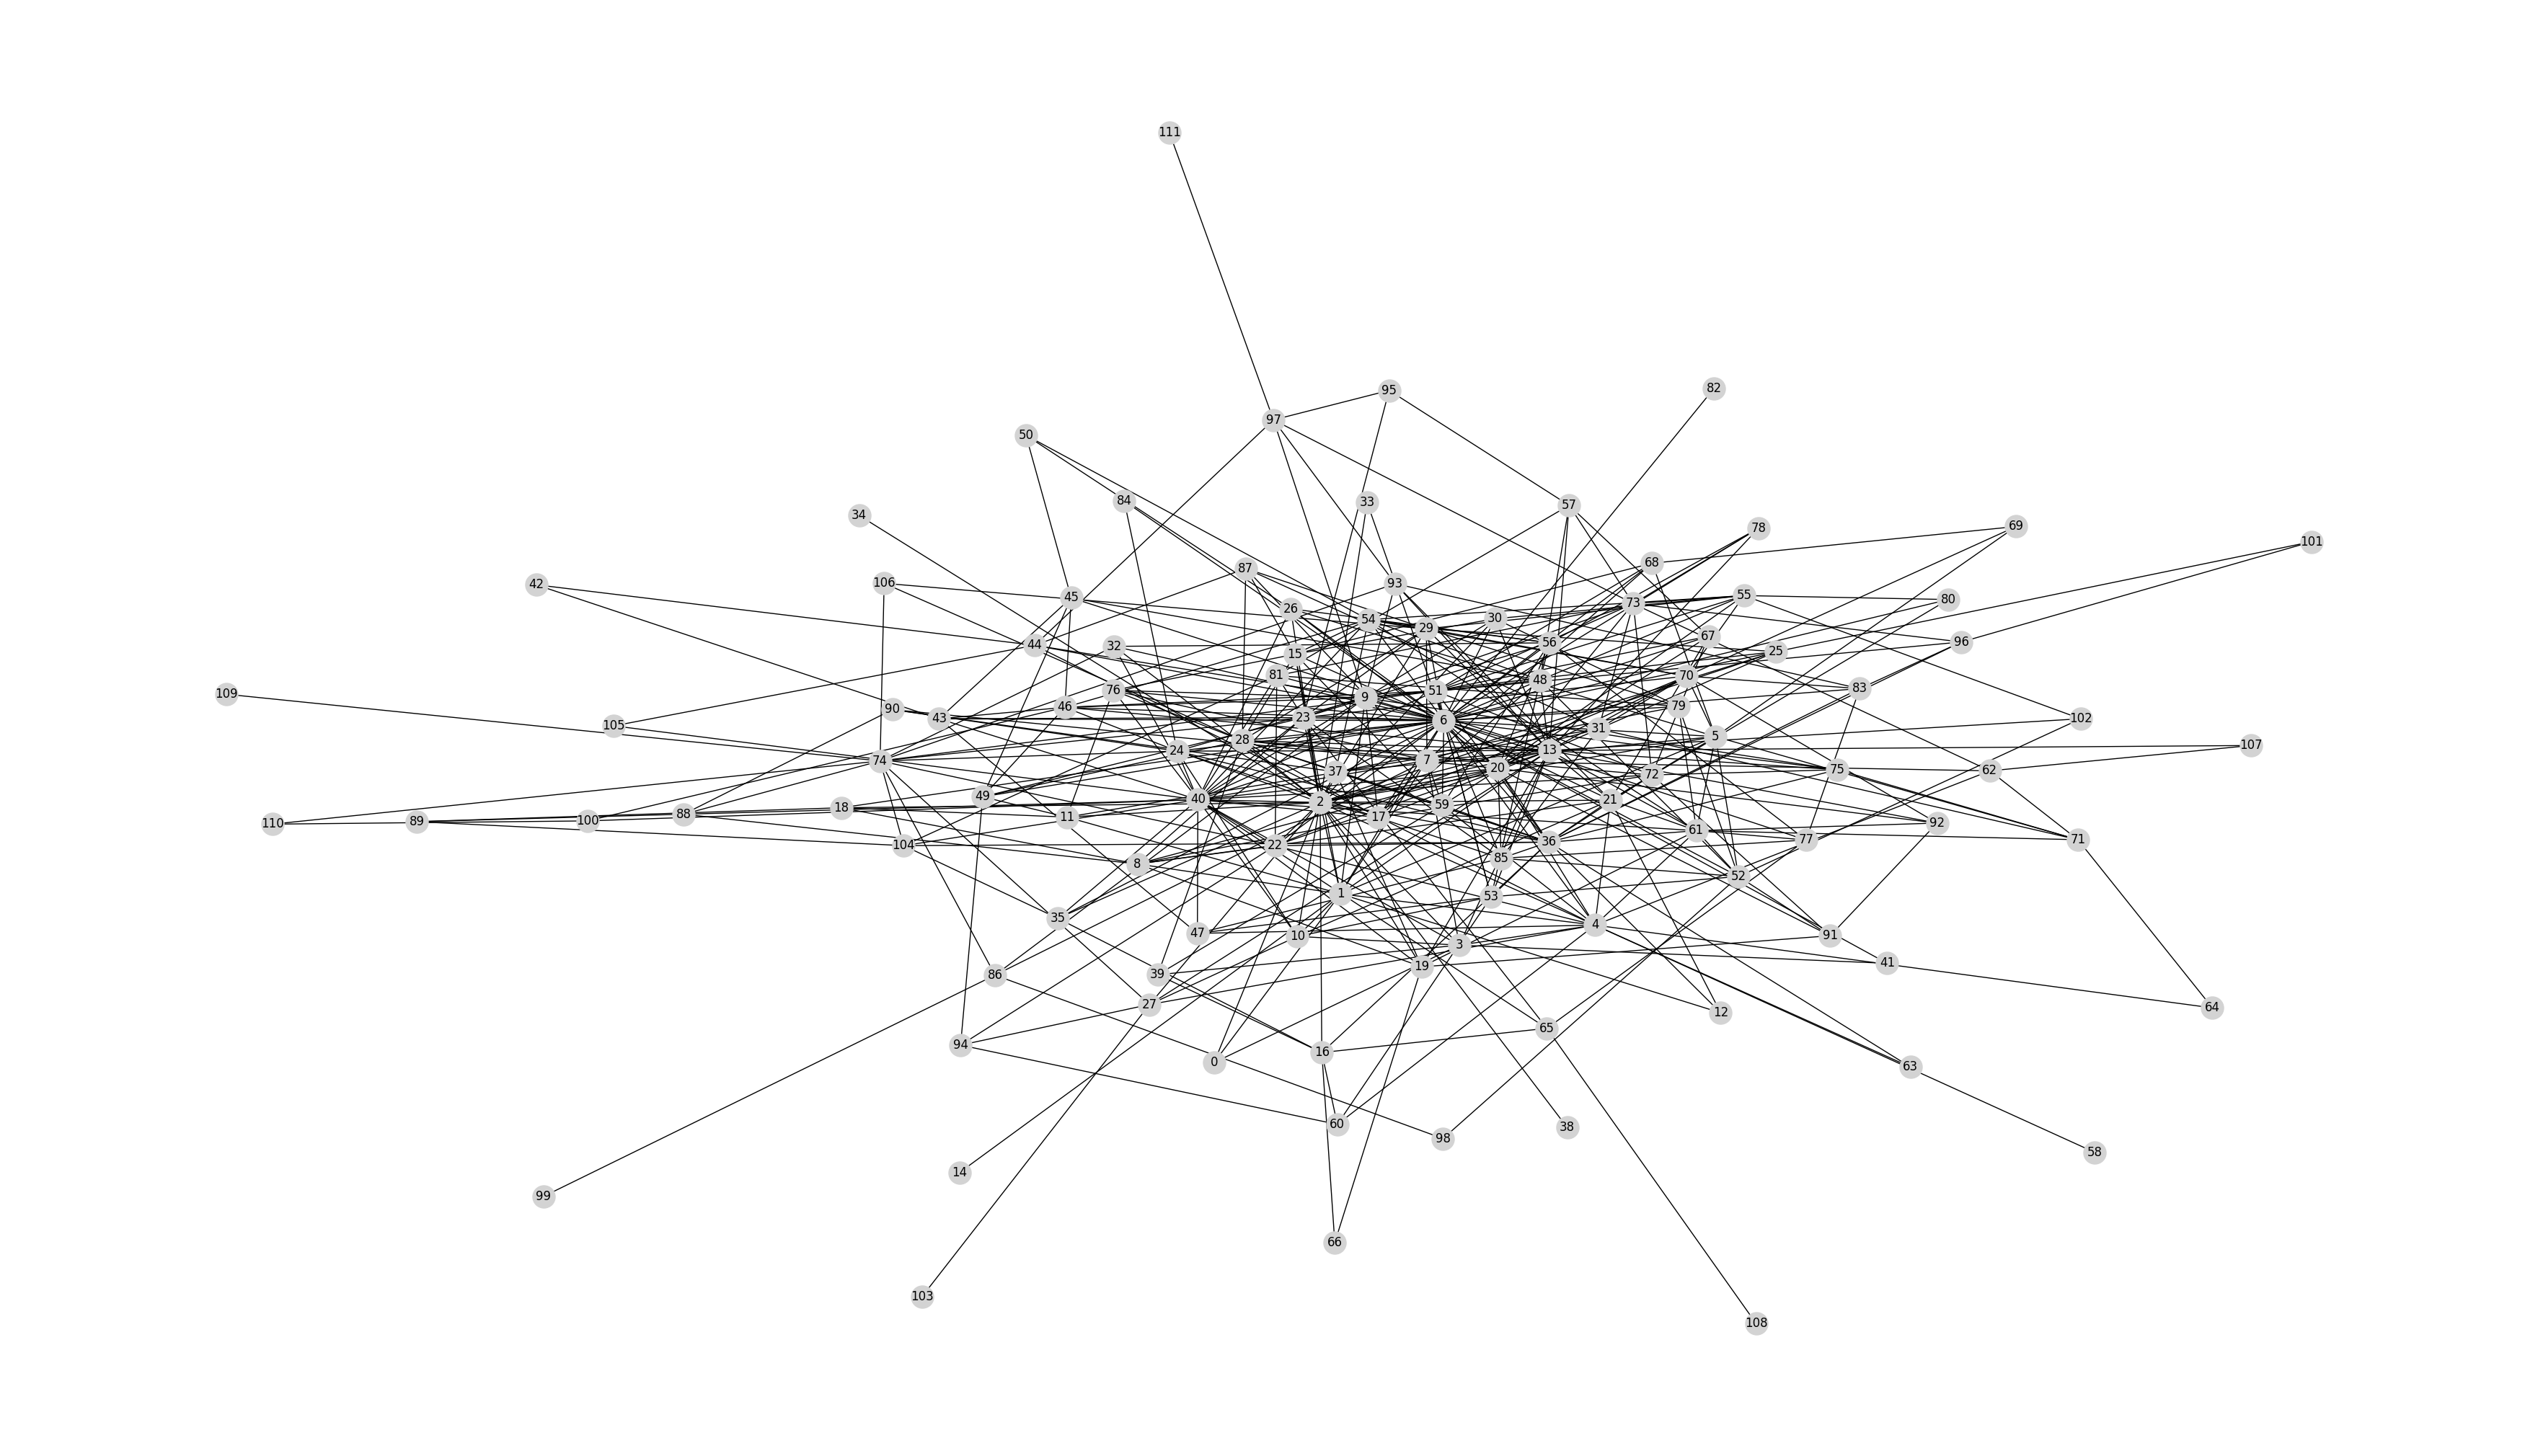

In [ ]:
# Leitura da rede
network = 'word_adjacencies'
url = f'https://raw.githubusercontent.com/GabrielaSAmaral/ComplexNetworks/main/Dados/{network}.txt'

response = requests.get(url)
with open(f'{network}.txt', 'w') as file:
    file.write(response.text)

G3 = nx.read_edgelist(f'{network}.txt', nodetype=int)

# Transformando os labels para números inteiros, começando com 0
G3 = nx.convert_node_labels_to_integers(G3, first_label=0)

# Para visualizar a rede
plt.figure(figsize=(35,20))
pos = nx.spring_layout(G3, seed = 11) # Definindo uma seed para sempre obter o mesmo gráfico (mesmas posições)
nx.draw(G3, pos, node_color='lightgray', node_size=500, with_labels=True)

In [ ]:
# Para tranformar a rede em sem direção. Porém, como a rede já é não direcionada, o código não é necessário.
G3 = G3.to_undirected()
G3.remove_edges_from(nx.selfloop_edges(G3))

Vamos selecionar apenas o maior componente conectado:

In [ ]:
Gcc = sorted(nx.connected_components(G3), key=len, reverse=True)
G3 = G3.subgraph(Gcc[0])

# Outra forma
# Gcc = max(nx.connected_components(G), key=len)
# G = G.subgraph(Gcc).copy()

Podemos verificar o número de vértices (nodes) e arestas (edges):

In [ ]:
N = len(G3)
M = G3.number_of_edges()
print('Número de nós (vértices):', N)
print('Número de arestas:', M)

Número de nós (vértices): 112
Número de arestas: 425


Agora, vamos calcular o coeficiente de correlação de Pearson entre o grau médio dos vizinhos e o grau:

In [ ]:
knn = []
for i in G3.nodes():
    aux =  nx.average_neighbor_degree(G3, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Média do grau do vizinho mais próximo:", "%3.2f"%np.mean(knn))


vk = dict(G3.degree())
# vk = list(vk.values())
vk = np.array(list(vk.values()))


knnk = []
ks = []

# Calculando knn(k) para cada grau único
for k in np.arange(np.min(vk), np.max(vk) + 1):
    aux = np.where(vk == k)[0]  # Obtém índices dos nós com grau k
    if len(aux) > 0:
        av_knn = np.mean(knn[aux])  # Média do grau do vizinho mais próximo
        knnk.append(av_knn)
        ks.append(k)

# Caculando o coeficiente de correlação de Pearson
rho = np.corrcoef(ks, knnk)[0,1]
print('Coeficiente de Correlação de Pearson:', round(rho,2))

Média do grau do vizinho mais próximo: 14.76
Coeficiente de Correlação de Pearson: -0.71


Temos que o coeficiente de correlação de Pearson (-0.71) é negativo, o que indica uma relação inversa: quando o grau k aumenta, o grau do vizinho mais próximo tende a diminuir, e o oposto também se aplica. Ainda, temos que o módulo desse valor é próximo de 1, indicando que essa relação inversa é forte e significativa.

Adicionalmnete, podemos fazer um gráfico dos valores do grau k pelo grau do vizinho mais próximo de k (knn):

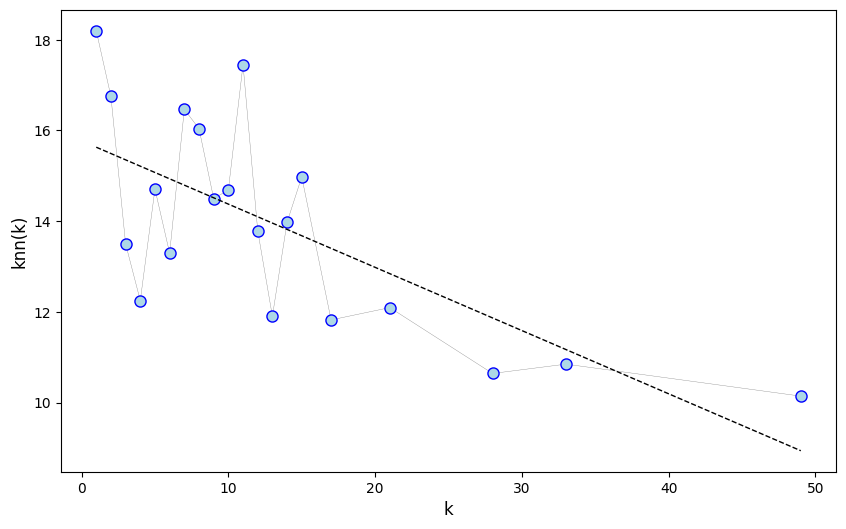

In [ ]:
# Criando a figura
fig = plt.figure(figsize=(10, 6))

plt.plot(ks, knnk, "-o", color="gray", markersize=8, linewidth=0.25,
         markerfacecolor="lightblue",
         markeredgecolor="blue",
         markeredgewidth=1)

plt.ylabel("knn(k)", fontsize=12)
plt.xlabel("k", fontsize=12)

# Ajuste de reta
par = np.polyfit(ks, knnk, 1, full=True)
slope, intercept = par[0]
xl = [min(ks), max(ks)]
yl = [slope * xx + intercept for xx in xl]
plt.plot(xl, yl, "--", linewidth=1, color="black")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# plt.savefig("knn.eps")  # Salvando a figura
plt.show()

É possível observar pelo gráfico o que já foi indicado pelo coeficiente de correlação de Pearson, de que a relação entre o grau k e o grau do vizinho mais próximo é inversa e forte.